<a href="https://colab.research.google.com/github/saurabhdaund76/NYC-Taxi-Trip-Time-Prediction-capstone-2/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML projects/NYC Taxi Data.csv')

In [5]:
# cheaking the dataset using 1st five rows 
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
# total ids 
len(df['id'].unique())

1458644

In [7]:
# total of columns 
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [8]:
df.describe()  # overview of the dataset mean max std 

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [10]:
df.shape

(1458644, 11)

In [11]:
df_new = df.copy()

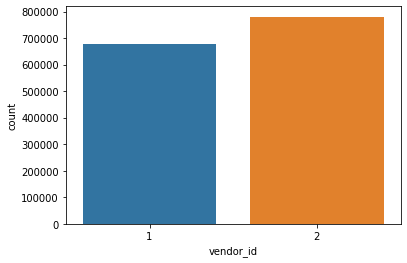

In [12]:
sns.countplot(x=df['vendor_id'])

In [13]:
df['pickup_datetime'].value_counts()

2016-03-04 08:07:34    5
2016-02-09 21:03:38    5
2016-01-12 18:48:44    5
2016-04-05 18:55:21    5
2016-06-10 23:17:17    5
                      ..
2016-01-01 10:53:52    1
2016-04-10 19:50:16    1
2016-04-12 15:29:59    1
2016-01-16 03:30:19    1
2016-04-24 00:22:46    1
Name: pickup_datetime, Length: 1380222, dtype: int64

In [14]:
list_of_columns = df.describe().columns
list_of_columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

In [15]:
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [16]:
df['passenger_count'].value_counts().reset_index().rename({'index':'no_of_passengers'} , axis=1)

,no_of_passengers,passenger_count
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333
5,4,28404
6,0,60
7,7,3
8,9,1
9,8,1


In [17]:
# passengers with 0 count has no meaning so we will drop all these rows which anyhow wont affect the dataset
df = df[df.passenger_count != 0]

In [18]:
df.shape

(1458584, 11)

In [19]:
# converting object type date into datetime 
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [20]:
df.dtypes # verify if object is converted to datetime

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [21]:
df.drop_duplicates(inplace=True)
df.shape

(1458584, 11)

In [22]:
df['pickup_datetime'][0]

Timestamp('2016-03-14 17:24:55')

In [23]:
# for better vizualization we will convert pickup nad drop time columns to extract days of pickup and drop

df['pick_day']= df['pickup_datetime'].dt.day_name()
df['drop_day'] = df['dropoff_datetime'].dt.day_name()


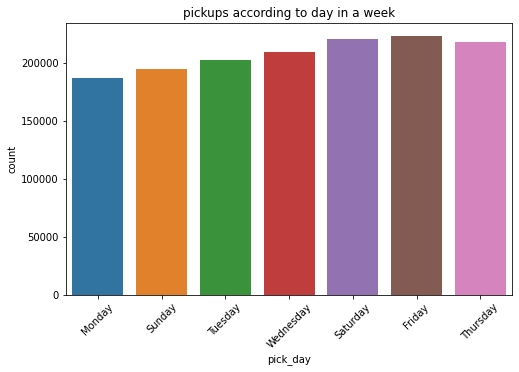

In [24]:
# we will plot countplot to see pickup days accoridng to count
fig =plt.figure(figsize=(8,5))
ax = fig.gca()
sns.countplot(x='pick_day' , data=df)
ax.set_title('pickups according to day in a week')
plt.xticks(rotation = '45')
plt.show()

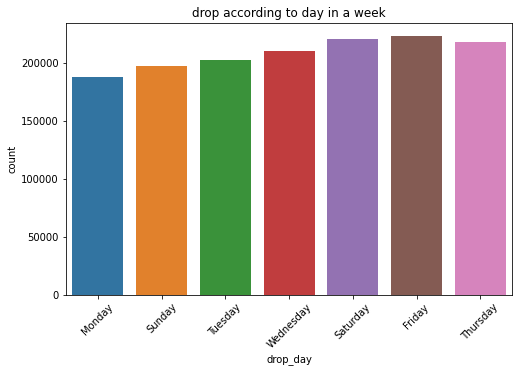

In [25]:
# we will plot countplot to see pickup days accoridng to count
fig =plt.figure(figsize=(8,5))
ax = fig.gca()
sns.countplot(x='drop_day' , data=df)
ax.set_title('drop according to day in a week')
plt.xticks(rotation='45')
plt.show()

* We can see that maximum pickup is in sat sun and minimum pickup is on monday








In [26]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_day,drop_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


In [27]:
# now to see how much was an avarage length of the duration 
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['drop_hour'] = df['dropoff_datetime'].dt.hour

In [28]:
# lets convert hours into bins of morning afternoon evening late night 
def timezone(x):
  x = 'morning' if x in range(6,12) else 'afternoon' if x in range(12,16) else 'evening' if x in range(16,22) else 'late_night'
  return x


In [29]:
df['time_zone'] = df['pickup_hour'].apply(timezone)

In [30]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_day,drop_day,pickup_hour,drop_hour,time_zone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,17,17,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,0,0,late_night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,11,12,morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,19,19,evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,13,13,afternoon


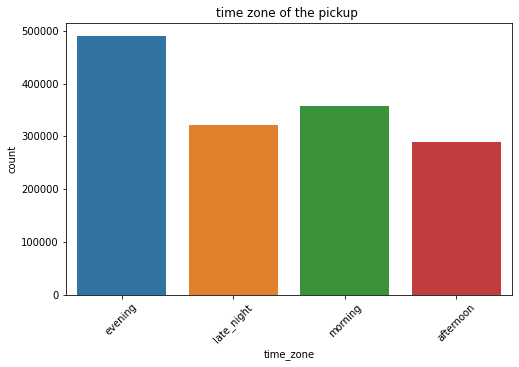

In [31]:
# countplot variation of the time zone
fig =plt.figure(figsize=(8,5))
ax = fig.gca()
sns.countplot(x='time_zone' , data=df)
ax.set_title('time zone of the pickup ')
plt.xticks(rotation='45')
plt.show()

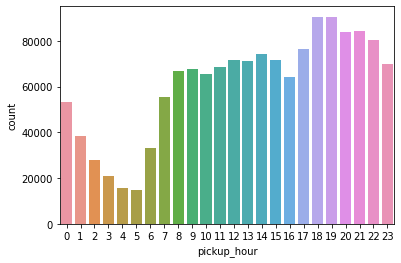

In [34]:
# plot of pickup hour 

sns.countplot(x = 'pickup_hour' , data=df)

18 19 hours ie evening 6-7 has maximum pickups can be related as office leave times

As longitiude and latitude are given so with the help of geopy.distance library we will get the distance 

SyntaxError: ignored

In [33]:
df['pickup_hour'].value_counts()

18    90599
19    90302
21    84181
20    84069
22    80490
17    76481
14    74289
12    71870
15    71810
13    71473
23    69780
11    68475
9     67662
8     67052
10    65437
16    64310
7     55600
0     53243
1     38563
6     33247
2     27970
3     20894
4     15790
5     14997
Name: pickup_hour, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

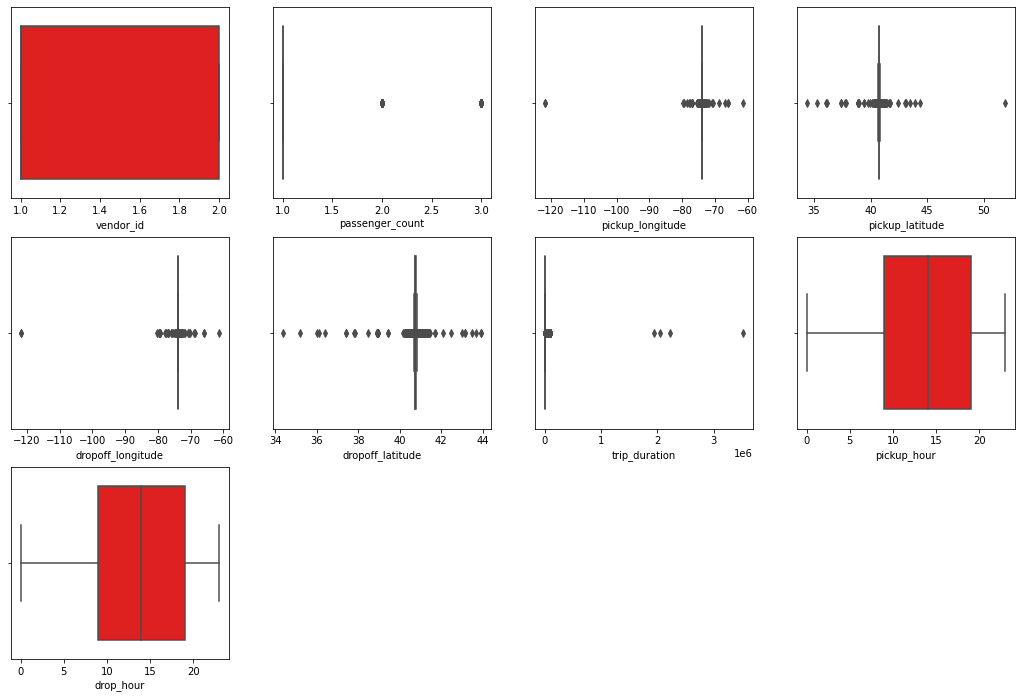

In [53]:
list_of_columns = df.describe().columns

plt.figure(figsize=(18,12))
n = 1
for column in list_of_columns:
  plt.subplot(3,4,n)
  n = n+1
  sns.boxplot(df[column], color= 'Red')
plt.show()

In [37]:
# lets handle these outliers 
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
7          3
9          1
8          1
Name: passenger_count, dtype: int64

As we can see maximum passengers lie in range of 1 to 4 so rest are outliers

* So we will handle the outliers using IQR 
* IQR = Q3-Q1
* where Q3 is quartile 3 ie 75% and quartile 1 is 25% 
* Which is also called as upper limit and lower limit 

In [38]:
# for passengers count
Q1_passenger = np.percentile(df['passenger_count'] , 25)
print(Q1_passenger)
Q2_passenger = np.percentile(df['passenger_count'],50)
print(Q2_passenger)
Q3_passenger = np.percentile(df['passenger_count'],75)
print(Q3_passenger)

1.0
1.0
2.0


* IQR is Q3-Q1 
* Q1 = lower limit = Q1_passenger-1.5*IQR
* Q3 = upper limit = Q3_passenger + 1.5*IQR

In [42]:
IQR = Q3_passenger- Q1_passenger

In [43]:
lower_limit_passenger = Q1_passenger - 1.5*IQR
upper_limit_passenger = Q3_passenger + 1.5*IQR

In [44]:
print("Lower limit for passenger is :" , lower_limit_passenger )
print("upper limit for passenger is :" , upper_limit_passenger )

Lower limit for passenger is : -0.5
upper limit for passenger is : 3.5


In [46]:
df = df[df['passenger_count']> lower_limit_passenger]
df = df[df['passenger_count']<upper_limit_passenger]

In [48]:
df.shape

(1303754, 16)

In [59]:
# outliers of trip duration
Q1_trip_duration = np.percentile(df['trip_duration'],25)
print(Q1_trip_duration)
Q2_trip_duration = np.percentile(df['trip_duration'],50)
print(Q2_trip_duration)
Q3_trip_duration = np.percentile(df['trip_duration'],75)
print(Q3_trip_duration)

396.0
661.0
1073.0


In [61]:
IQR = Q3_trip_duration- Q1_trip_duration
lower_limit_trip_duration = Q1_trip_duration - 1.5*IQR
upper_limit_trip_duration = Q3_trip_duration + 1.5*IQR

In [62]:
print("lower limit for trip_duration  :",lower_limit_trip_duration)
print("Upper limit for trip_duration  :",upper_limit_trip_duration)

lower limit for trip_duration  : -619.5
Upper limit for trip_duration  : 2088.5


In [66]:
df['trip_duration'].max()

3526282

In [70]:
print( df['trip_duration'].nlargest(100))

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
1310728      86332
194094       86331
950866       86331
1067747      86331
1422051      86331
Name: trip_duration, Length: 100, dtype: int64


In [71]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_day,drop_day,pickup_hour,drop_hour,time_zone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,17,17,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,0,0,late_night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,11,12,morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,19,19,evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,13,13,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,N,760,Sunday,Sunday,18,19,evening
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,Sunday,Sunday,7,7,morning
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,Friday,Friday,6,7,morning
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,Tuesday,Tuesday,15,16,afternoon
